In [1]:
import SAGA
from SAGA.targets import prepare_aat_catalog
print(SAGA.__version__)

0.6.26


In [2]:
from itertools import chain
from easyquery import Query
from astropy.table import Table, Column, vstack
from astropy.coordinates import SkyCoord, match_coordinates_sky

from SAGA.database import FitsTable
from SAGA import ObjectCuts as C
from SAGA.utils import fill_values_by_query

In [3]:
saga_database = SAGA.Database('/home/yymao/Dropbox/Academia/Collaborations/SAGA', '/home/yymao/Documents/Research/SAGA')

saga_host_catalog = SAGA.HostCatalog(saga_database)
saga_object_catalog = SAGA.ObjectCatalog(saga_database)
saga_targets = SAGA.TargetSelection(saga_database, 
                                    manual_selected_objids='manual_targets_aat2018a',
                                    gmm_parameters={'sdss':'gmm_parameters_no_outlier', 'des': 'gmm_parameters_no_outlier_no_u'})

## Rebuild base catalog

In [ ]:
#saga_object_catalog.build_and_write_to_database('aat_2018', overwrite=True)

## print target numbers

In [4]:
host_ids = saga_host_catalog.resolve_id('aat_2018', 'str')
score_bins = [100, 150, 180, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
d = np.array([np.searchsorted(targets['TARGETING_SCORE'], score_bins) \
              for targets in saga_targets.build_target_catalogs(host_ids, return_as='iter')])

/home/yymao/miniconda3/lib/python3.6/site-packages/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]


In [5]:
print(SAGA.targets.assign_targeting_score_v2.__doc__)

t = Table(d[:,1:] - d[:,:-1], names=score_bins[:-1])
t.add_column(Column(host_ids, 'host_id'), 0)
print("# in each bin")
t.pprint(-1, -1)

print()

t = Table(d[:,1:-1], names=['<{}'.format(s) for s in score_bins[1:-1]])
t.add_column(Column(host_ids, 'host_id'), 0)
print("# cumulative")
t.pprint(-1, -1)


    Last updated: 06/07/2018
     100 Human selection and Special targets
     150 satellites
     200 within host,  r < 17.77, gri cuts
     300 within host,  r < 20.75, high p_GMM or GMM outliers, gri cuts
     400 within host,  r < 20.75, high-proirity + gri cuts
     500 within host,  r < 20.75, gri cuts, random selection of 50
     600 very high p_GMM
     700 outwith host, r < 17.77
     800 within host,  r < 20.75, gri cuts, everything else
     900 outwith host, r < 20.75, gri cuts
    1000 everything else
    1100 Not in gri/fibermag_r_cut
    1200 Not galaxy
    1300 Not clean
    1400 Has spec but not a satellite
    
# in each bin
 host_id  100 150 180 200 300 400 500 600 700 800  900 
--------- --- --- --- --- --- --- --- --- --- ---- ----
  pgc2052   3   0   9   5  26 287  50  82  12  748 1158
  pgc3089  10   2   0  18 173 484  50  69  16  752 1414
  nsa3469   0   0   4   1   8  90  50  13   5  540 2042
nsa141465   0   1   9   1  15  60  49   6   4  286 2505
nsa165082   

## Generate AAT targeting lists

In [6]:
for host in saga_host_catalog.resolve_id('aat_2018', 'str'):
    print(host)
    t = prepare_aat_catalog(saga_targets.build_target_catalogs(host, return_as='list').pop(), '/home/yymao/Downloads/{}.txt'.format(host))
    break

pgc2052
# of flux stars = 70
# of sky fibers = 100
# of Priority=1 targets = 748
# of Priority=2 targets = 12
# of Priority=3 targets = 82
# of Priority=4 targets = 50
# of Priority=5 targets = 287
# of Priority=6 targets = 26
# of Priority=7 targets = 5
# of Priority=8 targets = 12
# of Priority=9 targets = 170
Writing to /home/yymao/Downloads/pgc2052.txt


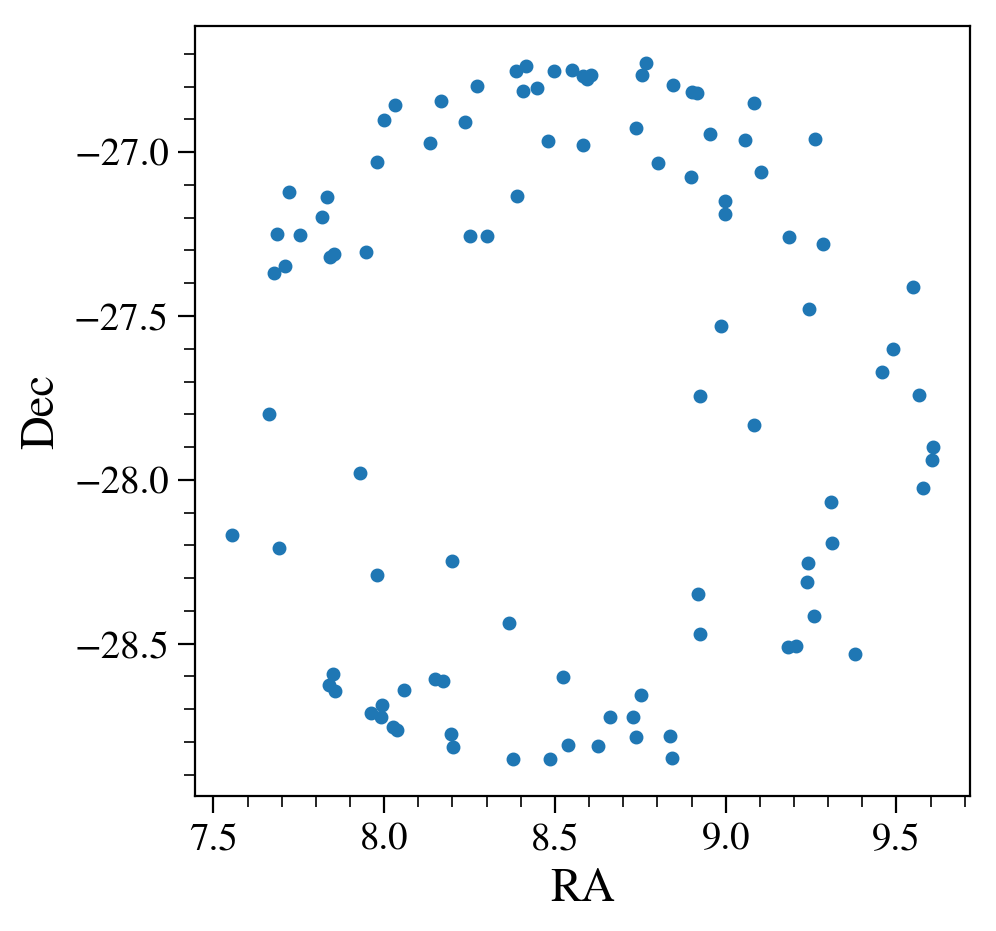

In [8]:
plt.figure(figsize=(5,5));
plt.scatter(*t[['RA', 'Dec']][t['TargetType'] == 'S'].itercols());
plt.xlabel('RA');
plt.ylabel('Dec');